In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata,study_results)

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.

number_mice_unique_df = combined_data["Mouse ID"].count()
number_mice_unique_df

1893

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Clean Dataframe of Mice without duplicate timepoints to be used for the rest of the steps

clean_df = combined_data.drop_duplicates(["Mouse ID","Timepoint"])
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice in the clean DataFrame.

number_mice_clean = clean_df["Mouse ID"].count()
number_mice_clean

1888

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": SEM})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot:title={'center':'Drug Regimen Count'}, xlabel='Drug Regimen'>

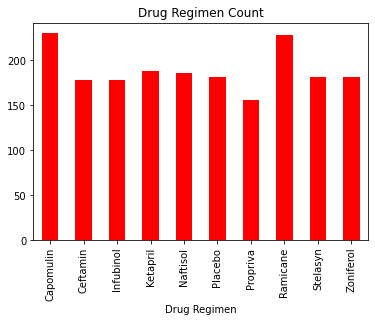

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()).reset_index()
drug_count = drug_data[["Drug Regimen", "Mouse ID"]].set_index("Drug Regimen")
drug_count.plot(kind="bar", title = "Drug Regimen Count", color="red", legend=False)


Text(0, 0.5, 'Drug Regimen Count')

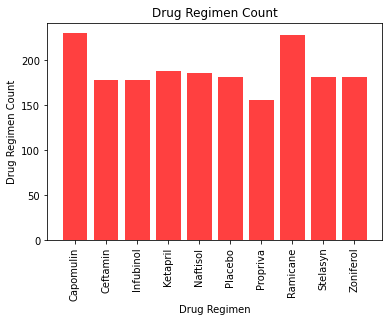

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

count = clean_df.groupby(["Drug Regimen"])["Age_months"].count()
drugs = summary_df.index

plt.bar(drugs, count, color='r', alpha=0.75, align="center")
plt.xticks(drugs,rotation="vertical")
plt.title("Drug Regimen Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Drug Regimen Count")

<AxesSubplot:title={'center':'Drug Regimen Count'}, ylabel='Mouse ID'>

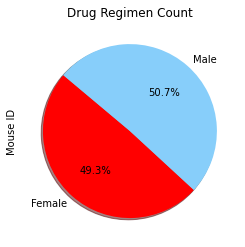

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_count = gender_data[["Sex", "Mouse ID"]].set_index("Sex")
gender_count
colors = ["red","lightskyblue"]
gender_count.plot(kind="pie",y = "Mouse ID", title="Drug Regimen Count", colors=colors, autopct='%1.1f%%',
              startangle=140, shadow=True, labels=gender_data["Sex"], legend = False,)

([<matplotlib.patches.Wedge at 0x7fa149128e20>,
 [Text(-0.7925485910066417, -0.9010364758950591, 'Females'),
  Text(0.726502952420448, 0.8259500348836922, 'Males')],
 [Text(-0.46232001142054097, -0.5256046109387844, '49.3%'),
  Text(0.3962743376838807, 0.4505182008456502, '50.7%')])

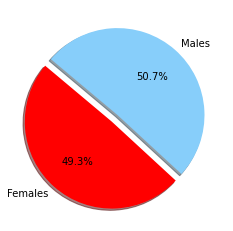

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean_df.groupby(["Sex"])["Mouse ID"].count()

labels = ["Females", "Males"]
colors = ["red","lightskyblue"]
explode = (0.1, 0)

plt.pie(gender, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
max_timepoint

timepoint_df = max_timepoint.to_frame()
timepoint_df


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Zoniferol    q633               70.827796
             s337               62.109651
             w140               47.717952
             w575               68.401286
             x613               48.077646

[249 rows x 1 columns]

In [30]:
# Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa1403eb490>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa148f37940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa1583aa6a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa148ef4160>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa148ef4f40>,
 'means': []}

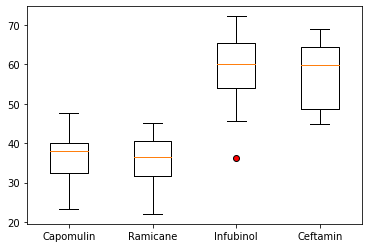

In [31]:

#Create lists by Drug type and tumor volume
tumor_list = timepoint_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
#Create dataframe
tumor_list_df = pd.DataFrame(tumor_list)
tumor_list_df = tumor_list_df.reindex(treatments)
#Create Boxplots
tumor_volume = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

    #Change potential outlier color
red_outlier = dict(markerfacecolor='r')
plt.boxplot(tumor_volume, labels=treatments, flierprops=red_outlier)

In [32]:
# Turn drug tumor volume lists into dataframes
capomulin_list = pd.DataFrame({'Tumor Volume':tumor_volume[0]})
ramicane_list = pd.DataFrame({'Tumor Volume':tumor_volume[1]})
infubinol_list = pd.DataFrame({'Tumor Volume':tumor_volume[2]})
ceftamin_list = pd.DataFrame({'Tumor Volume':tumor_volume[3]})

In [33]:
#Capomulin IQR and outlier data

quartiles = capomulin_list.quantile([0.25,0.5,0.75])
lowerq = quartiles['Tumor Volume'].min()
upperq = quartiles['Tumor Volume'].max()
iqr = upperq-lowerq

print(f"The lower quartile of Capolumin Tumor Volume is: {lowerq}")
print(f"The upper quartile of Capolumin Tumor Volume is: {upperq}")
print(f"The interquartile range of Capolumin Tumor Volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capolumin Tumor Volume is: 32.37735684
The upper quartile of Capolumin Tumor Volume is: 40.1592203
The interquartile range of Capolumin Tumor Volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no outliers


In [34]:
#Ramicane IQR and outlier data

quartiles = ramicane_list.quantile([0.25,0.5,0.75])
lowerq = quartiles['Tumor Volume'].min()
upperq = quartiles['Tumor Volume'].max()
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumor Volume is: {lowerq}")
print(f"The upper quartile of Ramicane Tumor Volume is: {upperq}")
print(f"The interquartile range of Ramicane Tumor Volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("There are no outliers")

The lower quartile of Ramicane Tumor Volume is: 31.56046955
The upper quartile of Ramicane Tumor Volume is: 40.65900627
The interquartile range of Ramicane Tumor Volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no outliers


In [35]:
#Infubinol IQR and outlier data

quartiles = infubinol_list.quantile([0.25,0.5,0.75])
lowerq = quartiles['Tumor Volume'].min()
upperq = quartiles['Tumor Volume'].max()
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumor Volume is: {lowerq}")
print(f"The upper quartile of Infubinol Tumor Volume is: {upperq}")
print(f"The interquartile range of Infubinol Tumor Volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol Tumor Volume is: 54.04860769
The upper quartile of Infubinol Tumor Volume is: 65.52574285
The interquartile range of Infubinol Tumor Volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
There are no outliers


In [36]:
#Ceftamin IQR and outlier data

quartiles = ceftamin_list.quantile([0.25,0.5,0.75])
lowerq = quartiles['Tumor Volume'].min()
upperq = quartiles['Tumor Volume'].max()
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumor Volume is: {lowerq}")
print(f"The upper quartile of Ceftamin Tumor Volume is: {upperq}")
print(f"The interquartile range of Ceftamin Tumor Volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin Tumor Volume is: 48.72207785
The upper quartile of Ceftamin Tumor Volume is: 64.29983003
The interquartile range of Ceftamin Tumor Volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
There are no outliers


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

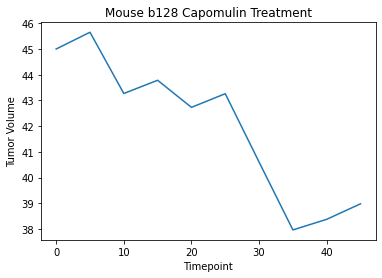

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Cap_analysis = clean_df[clean_df['Mouse ID'] == 'b128'] 
  
plt.plot(Cap_analysis['Timepoint'],Cap_analysis['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Mouse b128 Capomulin Treatment")
plt.plot

The correlation between both factors is 0.95


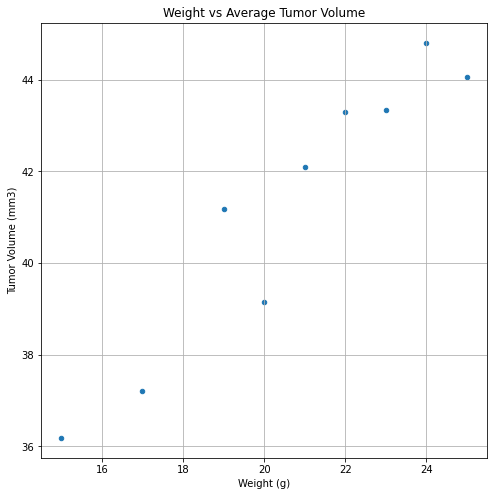

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_scatter = clean_df[clean_df["Drug Regimen"]=="Capomulin"]

capomulin_avg_weight = capomulin_scatter.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capo_grouped_plot = pd.DataFrame(capomulin_avg_weight).reset_index()

capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)',title="Weight vs Average Tumor Volume", grid = True, figsize= (8,8))


#Calculate the correlation coefficient 

Weight = capo_grouped_plot['Weight (g)']
TV = capo_grouped_plot['Tumor Volume (mm3)']

correlation = st.pearsonr(Weight,TV)
print(f"The correlation between both factors is {round(correlation[0],2)}")

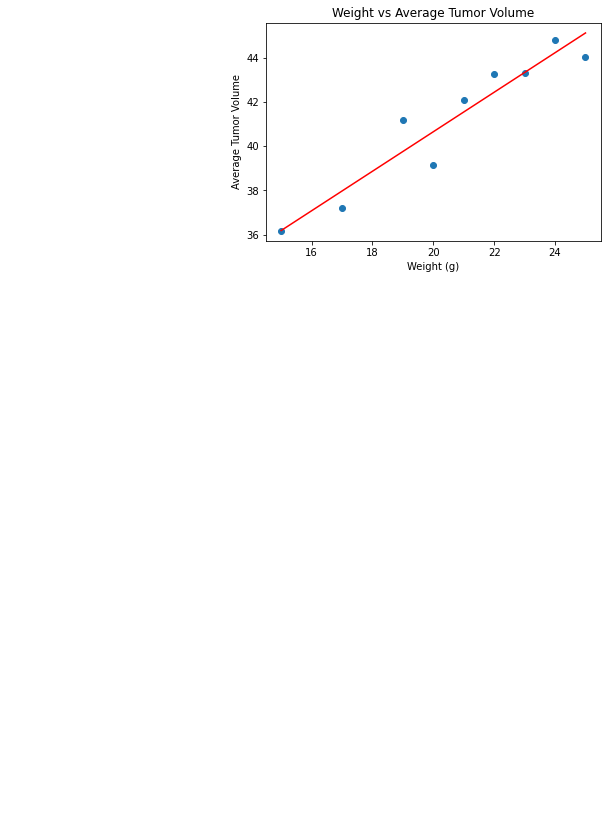

In [39]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capo_grouped_plot['Weight (g)']
y_values = capo_grouped_plot['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()


In [ ]:
# Insights
    # The correlation